In [13]:
## Jackson Boyle Section B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [5]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

tp_df = pd.read_csv("titanic.csv")

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [7]:
'''your code here'''
tp_df.head()
tp_df.count()
tp_df.query('Sex==1').shape[0]
((tp_df.query('Sex==1').shape[0])/ (tp_df.count()))*100
((tp_df.query('Survived==1').shape[0])/ (tp_df.count()))*100

## no AI use

Age             38.383838
Cabin          167.647059
Embarked        38.383838
Fare            38.383838
Name            38.383838
Parch           38.383838
PassengerId     38.383838
Pclass          38.383838
Sex             38.383838
SibSp           38.383838
Survived        38.383838
Ticket          38.383838
Title           38.383838
Family_Size     38.383838
dtype: float64

Your written answer:

 - 891
 - 64.76%
 - 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [9]:
'''your code here'''
(tp_df.query('Sex==0 and Survived==1').shape[0]) / (tp_df.query('Sex==0').shape[0]) * 100
(tp_df.query('Sex==1 and Survived==1').shape[0]) / (tp_df.query('Sex==1').shape[0]) * 100

# used ChatGPT to figure out that the 'and' needed to be included within the ' ', no other AI use

18.890814558058924

Your written answer:

 - 74.20%
 - 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [39]:
'''your code here'''
tp_df.head()
result = tp_df.groupby('Pclass').agg(tTickets = ('Pclass', 'size'), cSurvived = ('Survived', 'sum'))
result['pTickets'] = result['tTickets'] / result['tTickets'].sum() * 100
result['pSurvived'] = (result['cSurvived'] / result['tTickets']) * 100
print(result)

# used ChatGPt to figure out that using result[] would keep the dataframe neater and working better

        tTickets  cSurvived   pTickets  pSurvived
Pclass                                           
1            216        136  24.242424  62.962963
2            184         87  20.650954  47.282609
3            491        119  55.106622  24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [60]:
'''Your code here'''
tpo0_df = tp_df[tp_df['Survived'] == 0]
tpn0_df = tpo0_df[['Age', 'Name', 'Sex']]
tpn0_df.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


In [62]:
tpo1_df = tp_df[tp_df['Survived'] == 1]
tpn1_df = tpo1_df[['Age', 'Name', 'Sex']]
tpn1_df.head()

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


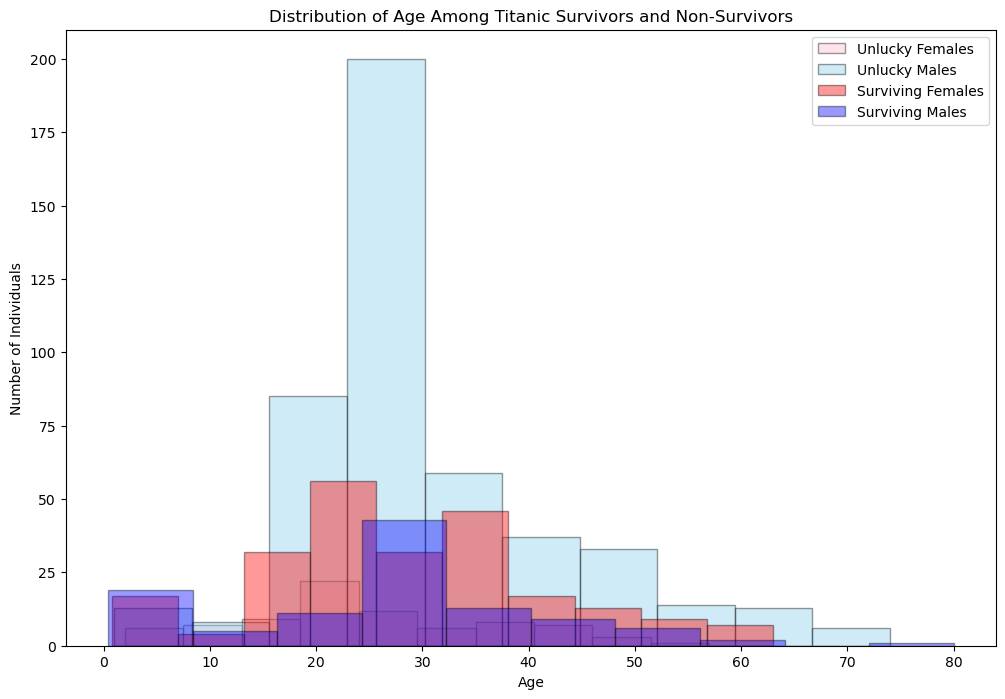

In [169]:
unlucky_females = tpn0_df[tpn0_df['Sex'] == 0]
unlucky_males = tpn0_df[tpn0_df['Sex'] == 1]
surviving_females = tpn1_df[tpn1_df['Sex'] == 0]
surviving_males = tpn1_df[tpn1_df['Sex'] == 1]
category_colors = {'Unlucky Females': 'pink', 'Unlucky Males': 'skyblue', 'Surviving Females': 'red', 'Surviving Males': 'blue'}

plt.figure(figsize=(12, 8))

for category, color in category_colors.items():
    if category == 'Unlucky Females':
        subset = unlucky_females
    elif category == 'Unlucky Males':
        subset = unlucky_males
    elif category == 'Surviving Females':
        subset = surviving_females
    elif category == 'Surviving Males':
        subset = surviving_males
        
    plt.hist(subset['Age'], bins=10, alpha=0.4, color =color, edgecolor='black', label=category)

plt.title("Distribution of Age Among Titanic Survivors and Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.legend()
plt.show()

# used ChatGPT to fix code to cycle through the different categories in a different/better way than I was earlier. 

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [149]:
'''Your code here'''
label = ['Survived']
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tp_df[features], tp_df[label], test_size = 0.2)

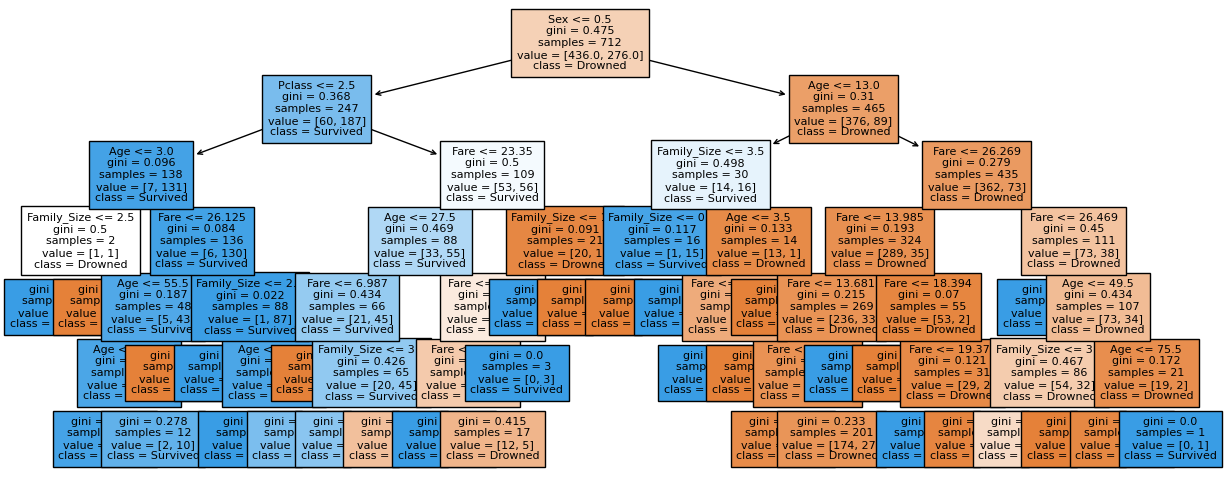

In [151]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 6)
tree_clf.fit(X_train, Y_train)

fig, ax = plt.subplots(1,1, figsize = (15, 6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'], 
          filled = True, fontsize = 8)
plt.show()

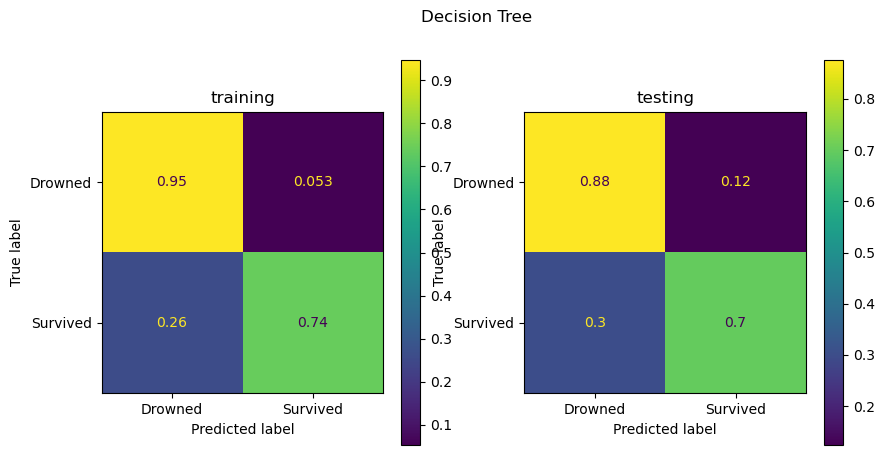

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

Y_tree_train = tree_clf.predict(X_train)
Y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(Y_train, Y_tree_train, normalize = 'true', display_labels = ['Drowned', 'Survived'], ax = ax[0]) 

ConfusionMatrixDisplay.from_predictions(Y_test, Y_tree_test, normalize = 'true', display_labels = ['Drowned', 'Survived'], ax = ax[1]) 

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()


In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

Ys_train = Y_train.values.ravel()
Ys_test = Y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, Ys_train)


KNeighborsClassifier(n_neighbors=15)

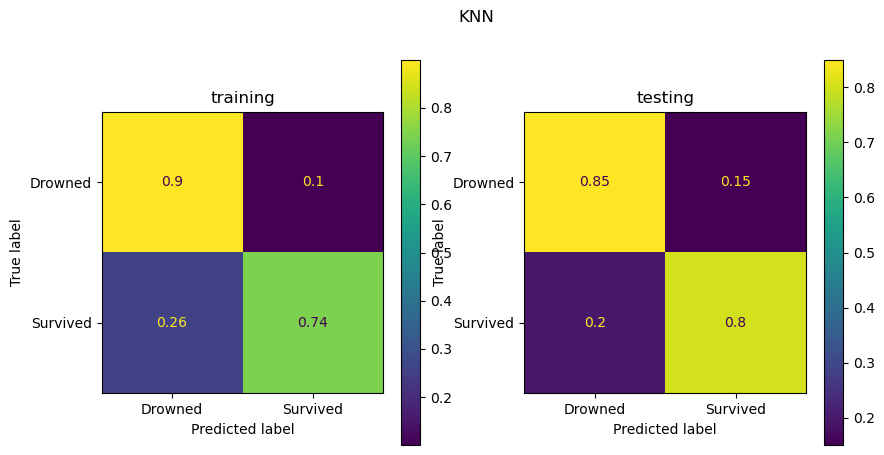

In [165]:
Y_knn_train = knn_clf.predict(Xs_train)
Y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(Y_train, Y_knn_train, normalize = 'true', display_labels = ['Drowned', 'Survived'], ax = ax[0]) 

ConfusionMatrixDisplay.from_predictions(Y_test, Y_knn_test, normalize = 'true', display_labels = ['Drowned', 'Survived'], ax = ax[1])

ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show()


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - It varied a little based on which model or which round of testing, but for the most part, the models tended to perform better on the training data then the test data as that it what it is literally based on.


Which models did you fit and which worked better?
 
 - We fit both the Decision Tree and KNN models. The decision tree performed better on drowned Titanic passengers but the KNN model performed better on surviving Titanic passengers. Overall, though, the decision tree model seems to have done a little better.